# Run model module locally

In [7]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/mnist/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/mnist/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/lsgan/trained_model2"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(16)
os.environ["TRAIN_STEPS"] = str(200)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(1000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(32)
os.environ["EVAL_STEPS"] = str(100)
os.environ["START_DELAY_SECS"] = str(60)
os.environ["THROTTLE_SECS"] = str(120)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(28)
os.environ["WIDTH"] = str(28)
depth = 1
os.environ["DEPTH"] = str(depth)

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(1024)
os.environ["GENERATOR_PROJECTION_DIMS"] = "7,7,256"
os.environ["GENERATOR_NUM_FILTERS"] = "128,64,{}".format(depth)
os.environ["GENERATOR_KERNEL_SIZES"] = "4,4,7"
os.environ["GENERATOR_STRIDES"] = "2,2,1"
os.environ["GENERATOR_USE_BATCH_NORM"] = "true,true"
os.environ["GENERATOR_BATCH_NORM_BEFORE_ACT"] = "false"
os.environ["GENERATOR_USE_LEAKY_RELU"] = "false"
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_FINAL_ACTIVATION"] = "tanh"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0002)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_NUM_FILTERS"] = "64,128"
os.environ["DISCRIMINATOR_KERNEL_SIZES"] = "4,4"
os.environ["DISCRIMINATOR_STRIDES"] = "2,2"
os.environ["DISCRIMINATOR_USE_BATCH_NORM"] = "true,true"
os.environ["DISCRIMINATOR_BATCH_NORM_BEFORE_ACT"] = "false"
os.environ["DISCRIMINATOR_USE_LEAKY_RELU"] = "true"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0002)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.5)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.999)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = "None"
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for loss hyperparameters.
os.environ["DISCRIMINATOR_LOSS_A"] = str(0.0)
os.environ["DISCRIMINATOR_LOSS_B"] = str(1.0)
os.environ["DISCRIMINATOR_LOSS_C"] = str(1.0)

## Train lsgan model

In [8]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/lsgan_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_num_filters=${GENERATOR_NUM_FILTERS} \
    --generator_kernel_sizes=${GENERATOR_KERNEL_SIZES} \
    --generator_strides=${GENERATOR_STRIDES} \
    --generator_use_batch_norm=${GENERATOR_USE_BATCH_NORM} \
    --generator_batch_norm_before_act=${GENERATOR_BATCH_NORM_BEFORE_ACT} \
    --generator_use_leaky_relu=${GENERATOR_USE_LEAKY_RELU} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --discriminator_num_filters=${DISCRIMINATOR_NUM_FILTERS} \
    --discriminator_kernel_sizes=${DISCRIMINATOR_KERNEL_SIZES} \
    --discriminator_strides=${DISCRIMINATOR_STRIDES} \
    --discriminator_use_batch_norm=${DISCRIMINATOR_USE_BATCH_NORM} \
    --discriminator_batch_norm_before_act=${DISCRIMINATOR_BATCH_NORM_BEFORE_ACT} \
    --discriminator_use_leaky_relu=${DISCRIMINATOR_USE_LEAKY_RELU} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS}


train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/mnist/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/mnist/test*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/', 'train_batch_size': 16, 'train_steps': 200, 'save_summary_steps': 100, 'save_checkpoints_steps': 1000, 'keep_checkpoint_max': 10, 'eval_batch_size': 32, 'eval_steps': 100, 'start_delay_secs': 60, 'throttle_secs': 120, 'height': 28, 'width': 28, 'depth': 1, 'latent_size': 1024, 'generator_projection_dims': [7, 7, 256], 'generator_num_filters': [128, 64, 1], 'generator_kernel_sizes': [4, 4, 7], 'generator_strides': [2, 2, 1], 'generator_use_batch_norm': [True, True], 'generator_use_leaky_relu': False, 'generator_leaky_relu_alpha': 0.2, 'generator_final_activation': 'tanh', 'generator_l1_regularization_scale': 0.0, 'generator_l2_regularization_scale': 0.0, 'generator_optimizer': 'Adam', 'generator_learning_rat

Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/#1593044896227878...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/checkpoint#1593045073313200...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/events.out.tfevents.1593044896.tf-1-15#1593045075248425...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/graph.pbtxt#1593044901104943...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/model.ckpt-0.data-00000-of-00001#1593044905296945...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/model.ckpt-0.index#1593044905649779...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/model.ckpt-0.meta#1593044909356867...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/model.ckpt-200.data-00000-of-00001#1593045071752765...
Removing gs://machine-learning-1234-bucket/gan/lsgan/trained_model2/model.ckpt-200.meta#1593045074748050...
Removing gs://machin

## Prediction

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
!gsutil ls gs://machine-learning-1234-bucket/gan/lsgan/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/lsgan/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/lsgan/trained_model/export/exporter/1593045827/
gs://machine-learning-1234-bucket/gan/lsgan/trained_model/export/exporter/1593048749/


In [11]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/lsgan/trained_model/export/exporter/1593048749"
)
predictions = predict_fn(
    {
        "Z": np.random.normal(size=(10, 100))
    }
)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/lsgan/trained_model/export/exporter/1593048749/variables/variables


In [12]:
print(list(predictions.keys()))

['generated_images']


Convert image back to the original scale.

In [13]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [14]:
print(generated_images.shape)

(10, 28, 28, 1)


In [15]:
def plot_images(images, color=True):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, image_size, image_size, num_channels].
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if color:
            plt.imshow(
                image,
                cmap=plt.cm.binary
            )
        else:
            plt.imshow(
                image.reshape(image.shape[:-1]),
                cmap="gray_r"
            )
    plt.show()

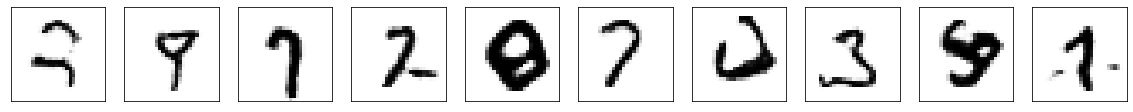

In [16]:
plot_images(images=generated_images, color=False)